# **Week 4 Assignment**
### Writing Shakespeare

In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 

import numpy as np
import matplotlib.pyplot as plt

In [3]:
# sonnets.txt
!gdown --id 108jAePKK4R3BVYBbYJZ32JWUwxeMg20K

data = open('./sonnets.txt').read()

corpus = data.lower().split("\n")

tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

Downloading...
From: https://drive.google.com/uc?id=108jAePKK4R3BVYBbYJZ32JWUwxeMg20K
To: /content/sonnets.txt
100% 93.6k/93.6k [00:00<00:00, 33.8MB/s]


In [4]:
# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [5]:
### START CODE HERE
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))# Your Embedding Layer)
model.add(Bidirectional(LSTM(150, return_sequences = True)))# An LSTM Layer)
model.add(Dropout(0.2))# A dropout layer)
model.add(LSTM(100))# Another LSTM Layer)
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))# A Dense Layer including regularizers)
model.add(Dense(total_words, activation='softmax'))# A Dense Layer)

# Pick an optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])# Pick a loss function and an optimizer)
### END CODE HERE

history = model.fit(predictors, label, epochs=100, verbose=1)

print(model.summary())

Epoch 1/100
484/484 [==============================] - 22s 26ms/step - loss: 6.9146 - accuracy: 0.0208
Epoch 2/100
484/484 [==============================] - 12s 26ms/step - loss: 6.4959 - accuracy: 0.0225
Epoch 3/100
484/484 [==============================] - 12s 26ms/step - loss: 6.3958 - accuracy: 0.0259
Epoch 4/100
484/484 [==============================] - 13s 26ms/step - loss: 6.2728 - accuracy: 0.0295
Epoch 5/100
484/484 [==============================] - 13s 26ms/step - loss: 6.1770 - accuracy: 0.0356
Epoch 6/100
484/484 [==============================] - 13s 26ms/step - loss: 6.0898 - accuracy: 0.0396
Epoch 7/100
484/484 [==============================] - 12s 26ms/step - loss: 6.0074 - accuracy: 0.0437
Epoch 8/100
484/484 [==============================] - 13s 26ms/step - loss: 5.9253 - accuracy: 0.0474
Epoch 9/100
484/484 [==============================] - 13s 26ms/step - loss: 5.8250 - accuracy: 0.0547
Epoch 10/100
484/484 [==============================] - 12s 26ms/step - l

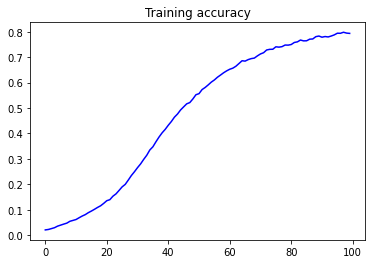

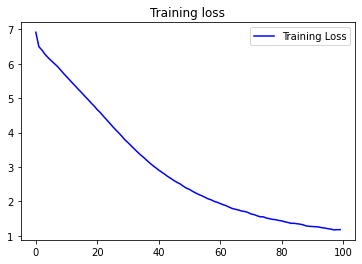

In [6]:
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [8]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
 
    #predicted = model.predict_classes(token_list, verbose=0)
    predicted = model.predict(token_list, verbose=0)
    predicted = predicted.argmax(axis=-1)

    output_word = ""

    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break

    seed_text += " " + output_word

print(seed_text)

Help me Obi Wan Kenobi, you're my only hope no thief my wit dumb part heart go esteem'd keep knows dead show'st new quite feast did forgot new new seen warm'd warm'd brought to loss to give thee thee back live more than old worth old in mine in good grow green memory green end true needing needing needing bow miss'd subscribes taste can part thee up me lack worth twain best new more shade new new blind argument rolling dumb heart cured grossly worth thee thence good blot her height from end prove forth green sun good present pain find too rage doth stand one days might find


**Trial 1**  
Help me Obi Wan Kenobi, you're my only hope no thief my wit dumb part heart go esteem'd keep knows dead show'st new quite feast did forgot new new seen warm'd warm'd brought to loss to give thee thee back live more than old worth old in mine in good grow green memory green end true needing needing needing bow miss'd subscribes taste can part thee up me lack worth twain best new more shade new new blind argument rolling dumb heart cured grossly worth thee thence good blot her height from end prove forth green sun good present pain find too rage doth stand one days might find

<br>

**Trial 2**  
Help me Obi Wan Kenobi, you're my only hope no thief my wit dumb part heart go esteem'd keep knows dead show'st new quite feast did forgot new new seen warm'd warm'd brought to loss to give thee thee back live more than old worth old in mine in good grow green memory green end true needing needing needing bow miss'd subscribes taste can part thee up me lack worth twain best new more shade new new blind argument rolling dumb heart cured grossly worth thee thence good blot her height from end prove forth green sun good present pain find too rage doth stand one days might find